In [1]:
import os
from subprocess import PIPE, run
import time
import pandas as pd
import numpy as np 
import pprint
import requests

n_sequences = 20883

In [6]:
pp = pprint.PrettyPrinter()

Data = pd.read_csv('/Users/sergiomares/Desktop/Nunez/Jin file/TSS_CpG_crispriphenotype_table.txt', delimiter = '\t',header = 0)

b = []

for i in range (n_sequences):
    try:
        datas = requests.get('http://togows.org/api/ucsc/hg19/'+ str(Data['chromosome'][i])+':'+str(int(Data["Primary TSS, 5'"][i]-1500))+'-'+str(Data["Primary TSS, 5'"][i]+1500)).text.replace('\n','')    
        b.append(Data['gene'][i])
        b.append(datas)
    except:
        print('There was an error with:',Data['gene'][i],'. With coordinates:', Data['chromosome'][i], Data["Primary TSS, 5'"][i])

#It took 106 minutes to comlpete all the sequences for 2.5 kb, but this run was with 3 kb

In [163]:
Promoter_sequences = pd.DataFrame()

for i in range(len(b)):
    Promoter_sequences[i] = pd.DataFrame(b)

Promoter_sequences = pd.DataFrame(b[::2], columns= ['Gene'])
Promoter_sequences['Sequences'] = b[1::2]

Promoter_sequences

Promoter_sequences.to_csv(r'3kb_Promoter.sequences.csv')

/var/folders/pj/0dd0rqzj219164nwyh4f2l580000gn/T/ipykernel_19810/2518979433.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Promoter_sequences[i] = pd.DataFrame(b)


TypeError: slice indices must be integers or None or have an __index__ method

In [92]:
Promoter_sequences = pd.read_csv('3kb_Promoter.sequences_ex1.csv', sep=',', header = 0)
Promoter_sequences = Promoter_sequences.drop_duplicates(subset = 'Gene')

In [240]:
Promoter_sequences.to_csv(r'motif-3kb_Promoter.sequences.csv')

In [112]:
# Counting the %GC Rich content

counts = Promoter_sequences.Sequences.apply(lambda x: (x.count('G') + x.count('C'))/30)
counts

0        53.333333
2        34.700000
3        34.833333
4        45.833333
5        53.500000
           ...    
20878    47.366667
20879    43.400000
20880    53.766667
20881    61.300000
20882    67.400000
Name: Sequences, Length: 19189, dtype: float64

In [100]:
cpgs = pd.read_csv('1-s2-S0092867421003536-mmc3.csv',sep = ',',  header = 0)
cpgs = pd.DataFrame(cpgs)

(-0.8, 0.2, -0.8, 0.2)

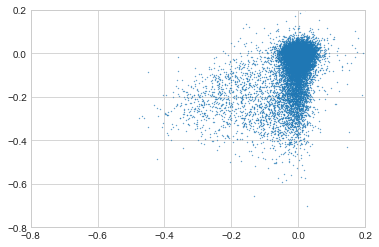

In [8]:
# from math import sqrt

# for i in range(21240):

#     if CpGs['mutant_average'][i] > CpGs['CRISPRoff_average'][i]:
#         CpGs.at[i, 'Phe_sco_pos_neg'] =  int(1)
#         CpGs.at[i,'Strength'] =  sqrt(abs(CpGs['mutant_average'][i] - CpGs['CRISPRoff_average'][i])) 

#     elif CpGs['mutant_average'][i] < CpGs['CRISPRoff_average'][i]:
#         CpGs.at[i, 'Phe_sco_pos_neg'] = int(0)
#         CpGs.at[i,'Strength'] = 0
#     else:
#         CpGs.at[i, 'Strength'] = 'Same'

import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

colors = {1:'tab:pink', 0:'tab:black', 'Nan':'tab:blue'}

plt.scatter(cpgs['mutant_average'], cpgs['CRISPRoff_average'],s = 0.1)
         
plt.axis([-0.8,0.2,-0.8,0.2])


In [101]:
cpgs = cpgs[['gene','CRISPRoff_average', 'mutant_average']]
cpgs = cpgs.sort_values(["gene",'CRISPRoff_average'], ascending = True).drop_duplicates(subset = 'gene', keep = 'first')
cpgs

,gene,CRISPRoff_average,mutant_average
3909,43891,-0.093578,0.302824
5409,43892,-0.054598,-0.029486
2475,43893,-0.163893,-0.118948
1178,43894,-0.250121,-0.110483
11969,43895,-0.005910,-0.020265
...,...,...,...
16654,ZYG11B,0.012916,-0.027637
14610,ZYX,0.004499,0.013557
19526,ZZEF1,0.029630,0.003709
1272,ZZZ3,-0.242959,0.017743


In [140]:
df = pd.merge(how = 'outer', left = Promoter_sequences, right = cpgs, left_on = 'Gene', right_on = 'gene')
df = df.loc[df.Gene.notna()]
df['GC'] = counts
df

,Gene,Sequences,gene,CRISPRoff_average,mutant_average,GC
0,A1BG,CCCAGCACTACCACCCTGGACTGGGAGGACAAGACCACAAAATGCA...,A1BG,-0.063267,-0.013067,53.333333
1,A1CF,TTTCTTTTGAGCCACATTTATTAACATCCACTGAATATAGTGTAGG...,A1CF,0.021009,0.031239,NaN
2,A2M,TTTTGATGATATTTTAAATTAATACTTAGATTACTTTTACAATTTT...,A2M,0.012236,0.010139,34.700000
3,A2ML1,TACTCTTTTGCCATTGCAGTTCCCCTGTCTTGATAAATCGGCTCTG...,A2ML1,0.006076,0.017281,34.833333
4,A3GALT2,CCTATAGGCCAGTGGTGCACCTGCGCACGTGGCCTGCACTCCAGCA...,A3GALT2,0.045413,0.018161,45.833333
...,...,...,...,...,...,...
19184,UQCRHL,TTTAAGATGGCTTTTGATTTATTTTGATGGAGGTAATGTATCAATT...,UQCRHL,-0.076844,0.010787,56.366667
19185,WTH3DI,GTAAGAACACGGAAATAGGGAACGGGGTAAGGGAGAGGTGAGAAGA...,WTH3DI,-0.022786,0.018067,69.166667
19186,ZAK,TTGTTTTTTAACCTCTACTCATTCATCCCTCAACTTTCATATCTTT...,ZAK,-0.104309,0.042356,53.733333
19187,ZHX1-C8ORF76,TTTTTTTTTTTTCTAATAGCTGGGCTGAGTTGACAGAAAAGGGCTG...,ZHX1-C8ORF76,-0.198818,-0.011289,55.733333


In [138]:
df['GC'] = df['GC'].apply(lambda x: 0 if x < 50 else x)

/var/folders/pj/0dd0rqzj219164nwyh4f2l580000gn/T/ipykernel_27490/2659433894.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(scalarmappaple)


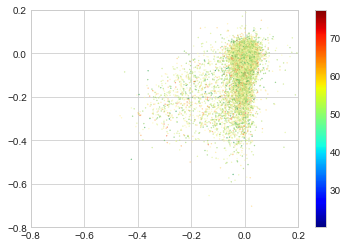

In [156]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

fig, ax = plt.subplots()
plt.style.use('seaborn-whitegrid')

colors = {1:'tab:pink', 0:'tab:black', 'Nan':'tab:blue'}

plt.scatter(df['mutant_average'], df['CRISPRoff_average'], c = df.GC, cmap = "RdYlGn",s = 0.1)

normalize = mcolors.Normalize(vmin=df.GC.min(), vmax=df.GC.max())
colormap = cm.jet

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(df.GC)
plt.colorbar(scalarmappaple)

plt.axis([-0.8,0.2,-0.8,0.2])
plt.savefig('good.eps', format = 'eps')


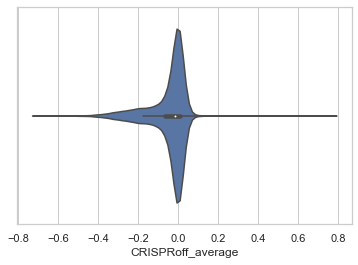

In [193]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.violinplot(x=df['CRISPRoff_average'])

/var/folders/pj/0dd0rqzj219164nwyh4f2l580000gn/T/ipykernel_27490/1950042842.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(scalarmappaple)


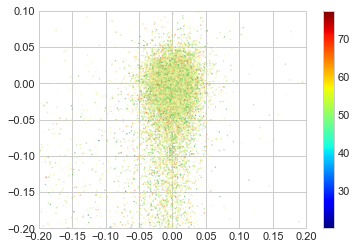

In [197]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

fig, ax = plt.subplots()
plt.style.use('seaborn-whitegrid')

colors = {1:'tab:pink', 0:'tab:black', 'Nan':'tab:blue'}

plt.scatter(df['mutant_average'], df['CRISPRoff_average'], c = df.GC, cmap = "RdYlGn",s = 0.1)

normalize = mcolors.Normalize(vmin=df.GC.min(), vmax=df.GC.max())
colormap = cm.jet

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(df.GC)
plt.colorbar(scalarmappaple)

plt.axis([-0.2,0.2,-0.2,0.1])
plt.savefig('good.eps', format = 'eps')


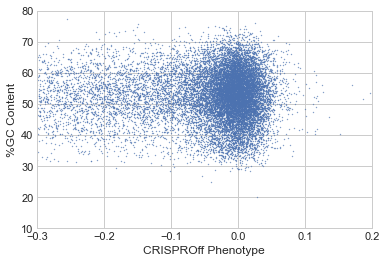

In [217]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

fig, ax = plt.subplots()
plt.style.use('seaborn-whitegrid')

colors = {1:'tab:pink', 0:'tab:black', 'Nan':'tab:blue'}

plt.scatter(df['CRISPRoff_average'], df['GC'], cmap = "RdYlGn",s = 0.1)

plt.xlabel('CRISPROff Phenotype')
plt.ylabel('%GC Content')

plt.axis([-0.3,0.2,10,80])
plt.savefig('good.eps', format = 'eps')


In [232]:
regression_data = df[['CRISPRoff_average','GC']].dropna()

coefficient of determination: 5.291085931502515e-05
slope: [0.60784422]
intercept: 52.680946652001


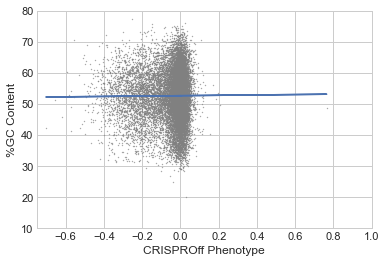

In [249]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression

x =  np.array(regression_data.CRISPRoff_average).reshape((-1,1))
y =  np.array(regression_data.GC)

model = LinearRegression()
model.fit(x,y)
model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)

m,b = np.polyfit(np.array(regression_data.CRISPRoff_average),y,1)

print('coefficient of determination:', r_sq)
print('slope:', model.coef_)
print('intercept:', model.intercept_)

fig, ax = plt.subplots()
plt.style.use('seaborn-whitegrid')

colors = {1:'tab:pink', 0:'tab:black', 'Nan':'tab:blue'}

plt.scatter(df['CRISPRoff_average'], df['GC'],s = 0.1, c = 'grey')


plt.xlabel('CRISPROff Phenotype')
plt.ylabel('%GC Content')
plt.plot(x, m*x + b)

plt.axis([-0.75,1,10,80])
plt.savefig('good.eps', format = 'eps')


In [264]:
achilles = pd.read_csv('Achilles_common_essentials.csv',sep = '(',  header = 0)
achilles = achilles['genes']

In [268]:
achilles_scores = pd.merge(how = 'outer', left = achilles, right = cpgs, left_on = 'genes', right_on = 'gene').dropna()

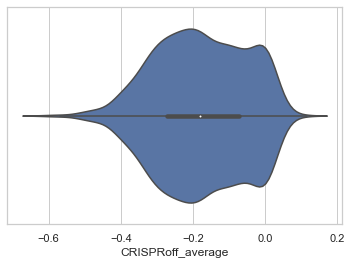

In [269]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.violinplot(x=achilles_scores['CRISPRoff_average'])

In [300]:
cpgs = pd.read_csv('1-s2-S0092867421003536-mmc3.csv',sep = ',',  header = 0)
cpgs = cpgs[['gene','CRISPRoff_average', 'mutant_average','CpG']]
cpgs = cpgs.sort_values(["gene",'CRISPRoff_average'], ascending = True).drop_duplicates(subset = 'gene', keep = 'first')
#cpgs['CpG'] = cpgs['CpG'].apply(lambda x:  1 if 'VERDADERO' else 0)

In [304]:
cpgs[cpgs.CpG == 'FALSO']

,gene,CRISPRoff_average,mutant_average,CpG
18757,44086,0.023959,0.017189,FALSO
18682,44088,0.023584,0.012517,FALSO
19763,44166,0.031839,0.025885,FALSO
18251,A1CF,0.021009,0.031239,FALSO
16516,A2M,0.012236,0.010139,FALSO
...,...,...,...,...
14459,ZSWIM1,0.003963,0.001552,FALSO
3162,ZSWIM3,-0.125409,0.001949,FALSO
12831,ZUFSP,-0.002342,-0.002830,FALSO
2729,ZWILCH,-0.148659,-0.113377,FALSO


In [289]:
achilles_cpgs = pd.merge(how = 'outer', left = achilles_scores, right = cpgs, left_on = 'genes', right_on = 'gene')
achilles_cpgs = achilles_cpgs.dropna()

In [305]:
achilles_cpgs[achilles_cpgs.CpG == 0]

,genes,gene_x,CRISPRoff_average_x,mutant_average_x,gene_y,CRISPRoff_average_y,mutant_average_y,CpG


In [290]:
achilles_cpgs

,genes,gene_x,CRISPRoff_average_x,mutant_average_x,gene_y,CRISPRoff_average_y,mutant_average_y,CpG
0,AAAS,AAAS,0.022066,0.033454,AAAS,0.022066,0.033454,1
1,AAMP,AAMP,-0.156843,-0.107485,AAMP,-0.156843,-0.107485,1
2,AARS,AARS,-0.262698,-0.276756,AARS,-0.262698,-0.276756,1
3,AARS2,AARS2,-0.143610,0.000784,AARS2,-0.143610,0.000784,1
4,AASDHPPT,AASDHPPT,-0.299343,-0.029740,AASDHPPT,-0.299343,-0.029740,1
...,...,...,...,...,...,...,...,...
1994,ZNRD1,ZNRD1,-0.264723,-0.206160,ZNRD1,-0.264723,-0.206160,1
1995,ZRANB2,ZRANB2,-0.113596,-0.040849,ZRANB2,-0.113596,-0.040849,1
1996,ZRSR2,ZRSR2,-0.162753,-0.028557,ZRSR2,-0.162753,-0.028557,1
1997,ZW10,ZW10,-0.245077,0.034984,ZW10,-0.245077,0.034984,1


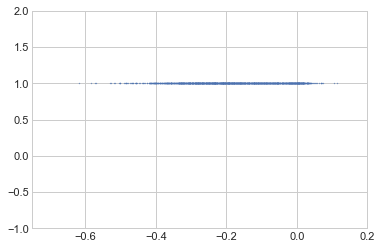

In [299]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

fig, ax = plt.subplots()
plt.style.use('seaborn-whitegrid')

plt.scatter(achilles_cpgs['CRISPRoff_average_x'], achilles_cpgs['CpG'], cmap = "RdYlGn",s = 0.1)

plt.axis([-0.75,0.2,-1,2])
plt.savefig('good.eps', format = 'eps')
